In [1]:
import rebound
import reboundx
import os
import random
import numpy as np

c = 100.
def bary(reb_sim, rebx_effect): 
    sim = reb_sim.contents
    ps[2].ax = 0.
    ps[2].ay = 0.
    ps[2].az = 0.
    '''
    s = sim.calculate_com()
    prefac1 = 6.*sim.G**2*s.m**2/c**2
    for i in range(2):
        if i == 0:
            continue
        diff = ps[i] - s
        r2 = diff.x**2 + diff.y**2 + diff.z**2
        prefac = prefac1/r2**2
        ps[i].ax -= prefac*diff.x
        ps[i].ay -= prefac*diff.y
        ps[i].az -= prefac*diff.z
        ps[2].ax += ps[i].m/ps[2].r*prefac*diff.x
        ps[2].ay += ps[i].m/ps[2].r*prefac*diff.y
        ps[2].az += ps[i].m/ps[2].r*prefac*diff.z
    '''
        
def baryE(sim):
    E = sim.calculate_energy()
    s = sim.calculate_com()
    prefac = 3.*sim.G**2*s.m**2/c**2
    for i in range(sim.N_real):
        if i == 0:
            continue
        diff = ps[i] - s
        E -= prefac*ps[i].m/(diff.x**2 + diff.y**2 + diff.z**2)
    return E

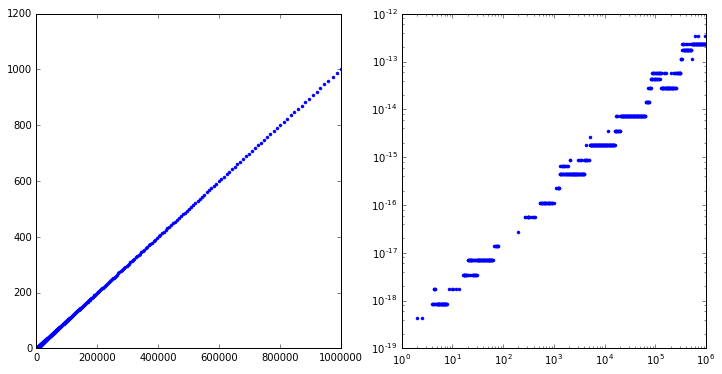

In [30]:
random.seed(os.getpid())
sim = rebound.Simulation()
sim.add(m=1., vy=1.e-3)
ps = sim.particles
Nout = 1000
tmax = 1.e6
xs, ys = np.zeros(Nout), np.zeros(Nout)
times = np.logspace(0,np.log10(tmax),Nout)
for i, t in enumerate(times):
    sim.integrate(t)
    xs[i] = ps[0].x
    ys[i] = ps[0].y

%matplotlib inline
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(ncols=2, figsize=(12,6))
axarr[0].plot(times, np.abs(ys), 'b.')
axarr[1].plot(times, np.abs(ys-1.e-3*times), 'b.')
axarr[1].set_yscale('log')
axarr[1].set_xscale('log')

In [15]:
random.seed(os.getpid())
sim = rebound.Simulation()
sim.add(m=1.)
sim.add(m=1.e-3, a=1., f=0.)#random.random()*2.*np.pi)
com = sim.calculate_com()
comvy = com.vy
sim.move_to_com()
#sim.add(com)
ps = sim.particles
#ps[2].r = ps[2].m
#ps[2].m = 0.

#rebx = reboundx.Extras(sim)
#rebx.add_custom_force(bary, 0)

#sim.ri_ias15.epsilon_global = 0

In [16]:
sim.integrate(1.)

In [17]:
sim.dt_last_done

0.14726622889100016

In [14]:
Nout = 1000
tmax = 1.e0
comx, comy = np.zeros(Nout), np.zeros(Nout)
xrels, yrels = np.zeros(Nout), np.zeros(Nout)
times = np.linspace(0,tmax,Nout)
for i, t in enumerate(times):
    sim.integrate(t)
    comx[i] = ps[2].x
    comy[i] = ps[2].y
    xrels[i] = ps[1].x
    yrels[i] = ps[1].y

%matplotlib inline
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(ncols=2, figsize=(12,6))
axarr[0].plot(times, np.abs(comy), 'b.')
axarr[1].plot(times, np.abs(comy-comvy*times), 'b.')
axarr[1].set_yscale('log')
axarr[1].set_xscale('log')

IndexError: invalid index

In [19]:
yrels[-1]

0.8409000632509892

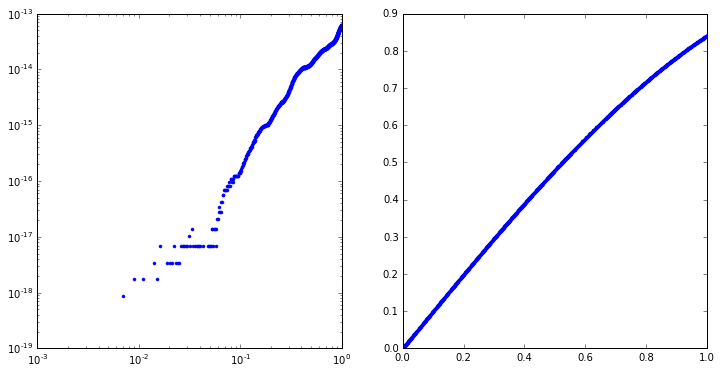

In [5]:
sim = rebound.Simulation()
sim.add(m=1.)
sim.add(m=1.e-3, a=1., f=0.)
ps = sim.particles

xs, ys = np.zeros(Nout), np.zeros(Nout)
for i, t in enumerate(times):
    sim.integrate(t)
    xs[i] = ps[1].x
    ys[i] = ps[1].y

%matplotlib inline
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(ncols=2, figsize=(12,6))
axarr[0].plot(times, np.abs(ys-(comy+yrels)), 'b.')
axarr[0].set_yscale('log')
axarr[0].set_xscale('log')
axarr[1].plot(times, yrels, 'b.')

In [7]:
sim.dt_last_done

1.0010010009775527e-06

In [ ]:
E0 = baryE(sim)
Nout = 1000
tmax = 1.e1
comr = np.zeros(Nout)
Eerr = np.zeros(Nout)
es = np.zeros(Nout)
times = np.logspace(0,np.log10(tmax),Nout)
for i, t in enumerate(times):
    sim.integrate(t)
    es[i] = ps[1].e
    com = sim.calculate_com()
    comr[i] = abs((np.sqrt(com.x**2 + com.y**2)-1.e-3)/1.e-3)
    Eerr[i] = abs((baryE(sim)-E0)/E0)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, axarr = plt.subplots(ncols=2, figsize=(12,6))
axarr[0].plot(times, comr, 'b.')
axarr[0].set_xscale('log')
axarr[0].set_yscale('log')
axarr[0].set_xlabel('time', fontsize=18)
axarr[0].set_ylabel(r'$R_{COM}$', fontsize=18)
axarr[1].plot(times, Eerr, 'b.')
axarr[1].set_xscale('log')
axarr[1].set_yscale('log')
axarr[1].set_xlabel('time', fontsize=18)
axarr[1].set_ylabel(r'Rel. Energy Error', fontsize=18)